In [99]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [100]:
# # Reading and dropping duplicates algo
algo_returns_csv = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.drop_duplicates()
algo_returns.isnull()
algo_returns.dropna()

algo = algo_returns

In [101]:
# Custom Portfolio Stock Picks
aal_historical_csv = Path('Resources/Stock Portfolio - AAL.csv')
aal_historical = pd.read_csv(aal_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop = ['Company Name']
aal_historical.drop(to_drop, inplace=True, axis=1)

aapl_historical_csv = Path('Resources/Stock Portfolio - AAPL.csv')
aapl_historical = pd.read_csv(aapl_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop2 = ['Company Name']
aapl_historical.drop(to_drop2, inplace=True, axis=1)

ba_historical_csv = Path('Resources/Stock Portfolio - BA.csv')
ba_historical = pd.read_csv(ba_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop3 = ['Company Name']
ba_historical.drop(to_drop3, inplace=True, axis=1)

ccl_historical_csv = Path('Resources/Stock Portfolio - CCL.csv')
ccl_historical = pd.read_csv(ccl_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop4 = ['Company Name']
ccl_historical.drop(to_drop4, inplace=True, axis=1)

ge_historical_csv = Path('Resources/Stock Portfolio - GE.csv')
ge_historical = pd.read_csv(ge_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop5 = ['Company Name']
ge_historical.drop(to_drop5, inplace=True, axis=1)

jblu_historical_csv = Path('Resources/Stock Portfolio - JBLU.csv')
jblu_historical = pd.read_csv(jblu_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop6 = ['Company Name']
jblu_historical.drop(to_drop6, inplace=True, axis=1)

nep_historical_csv = Path('Resources/Stock Portfolio - NEP.csv')
nep_historical = pd.read_csv(nep_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop7 = ['Company Name']
nep_historical.drop(to_drop7, inplace=True, axis=1)

psec_historical_csv = Path('Resources/Stock Portfolio - PSEC.csv')
psec_historical = pd.read_csv(psec_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop8 = ['Company Name']
psec_historical.drop(to_drop8, inplace=True, axis=1)

ual_historical_csv = Path('Resources/Stock Portfolio - UAL.csv')
ual_historical = pd.read_csv(ual_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
to_drop9 = ['Company Name']
ual_historical.drop(to_drop9, inplace=True, axis=1)


<AxesSubplot:xlabel='Dates'>

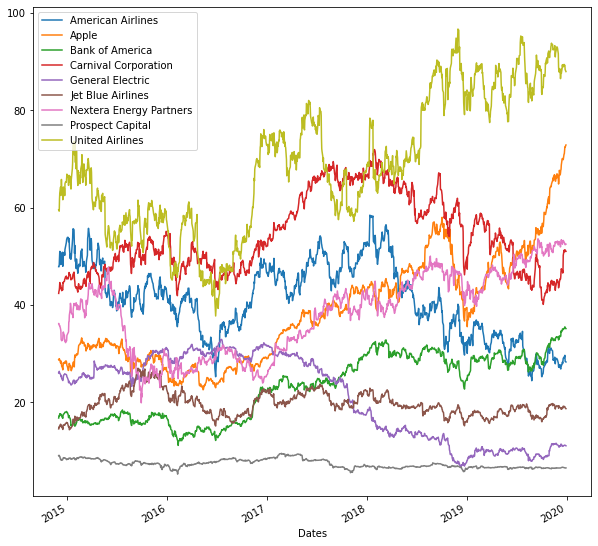

In [102]:
# Combine all stocks into one portfolio
custom_portfolio = pd.concat([aal_historical, aapl_historical, ba_historical, ccl_historical, 
                             ge_historical, jblu_historical, nep_historical, psec_historical, 
                              ual_historical], axis='columns', join='inner')

# Fix columns to match closing prices
columns = ['American Airlines', 'Apple', 'Bank of America', 'Carnival Corporation',
          'General Electric', 'Jet Blue Airlines', 'Nextera Energy Partners',
          'Prospect Capital', 'United Airlines']
custom_portfolio.columns = columns

# Fix index to match sp500 dataset
custom_portfolio.index
date = custom_portfolio.index
date = [x.date().isoformat() for x in date]
dt = np.array(date)

custom_portfolio['Dates'] = date
custom_portfolio['Dates'] = pd.to_datetime(custom_portfolio['Dates'], 
                                           infer_datetime_format=True)
custom_portfolio.set_index('Dates', inplace=True)

custom_portfolio.plot(figsize=(10,10))

In [103]:
# Set weights
weights = [0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]
portfolio_returns = custom_portfolio.dot(weights)

portfolio_returns = portfolio_returns.pct_change()
portfolio_returns.head()

Dates
2014-12-01         NaN
2014-12-02    0.003343
2014-12-03    0.002942
2014-12-04    0.013675
2014-12-05    0.014188
dtype: float64

In [104]:
# Placing my portfolio inside the whole dataframe
combined_returns['Jesus Portfolio'] = portfolio_returns
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2,Jesus Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949,0.007811
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416,-0.001093
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323,-0.003747
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460,-0.015943
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303,0.003687


<AxesSubplot:xlabel='Date'>

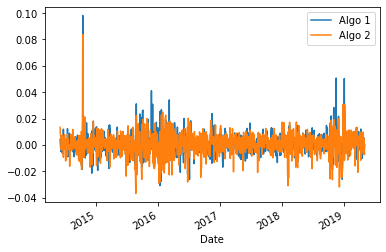

In [105]:
algo.dtypes
algo.dropna(inplace=True)
algo.plot()

In [106]:
# Reading and dropping dupplicates sp500 and changing Close to S&P500
sp500_historical_csv = Path('Resources/sp500_history.csv')
sp500_historical = pd.read_csv(sp500_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
columns = ['S&P500']
sp500_historical.columns = columns
sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)
sp500_historical

<ipython-input-106-2724794347d8>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)


,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [107]:
# Changed dataset type from object to float
sp500_historical = sp500_historical.astype(float)
sp500_historical.dropna()

sp500 = sp500_historical
sp500.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

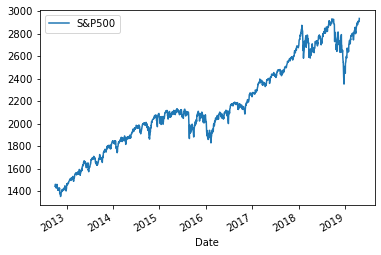

In [108]:
# Plotting the sp500
sp500.plot()

In [109]:
# Daily returns sp500
sp500_returns = sp500.pct_change()
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


<AxesSubplot:xlabel='Date'>

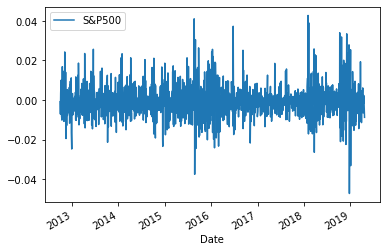

In [110]:
# SP500 plot
sp500_returns.plot()

<AxesSubplot:xlabel='Date'>

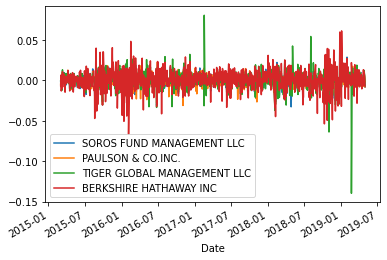

In [111]:
# Reading and dropping duplicates whale returns
whale_returns_csv = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.drop_duplicates()
whale_returns.isnull()
whale_returns.dropna(inplace=True)

whales = whale_returns

whales.plot()

<AxesSubplot:xlabel='Date'>

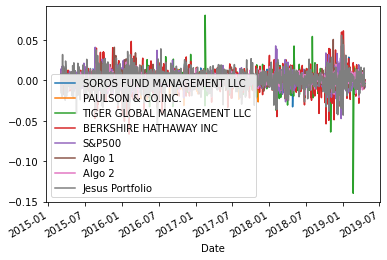

In [138]:
# Plot returns for visual
combined_returns.plot()

In [139]:
# Cumulative Returns for each portfolio
cumulative_returns_algo = (1 + algo).cumprod()
cumulative_returns_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


In [140]:
cumulative_returns_sp500 = (1 + sp500_returns).cumprod()
cumulative_returns_sp500.head()

,S&P500
Date,
2019-04-22,0.991236
2019-04-18,0.990234
2019-04-17,0.988673
2019-04-16,0.990926
2019-04-15,0.990422


In [141]:
cumulative_returns_whales = (1 + whales).cumprod()
cumulative_returns_whales.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


In [143]:
cumulative_returns_jesus = (1 + portfolio_returns).cumprod()


In [144]:
cumulative_returns = pd.concat([cumulative_returns_algo, cumulative_returns_sp500
                               , cumulative_returns_whales, cumulative_returns_jesus], axis='columns', join='inner')

We can observe how the returns differ between funds. 
Algo 1 shows the highest levels of returns when compared to the others.
PAULSON & CO shows the lowest levels of return, and Algo 2 is mostly in par with fund like BERKSHIRE HATHAWAY.


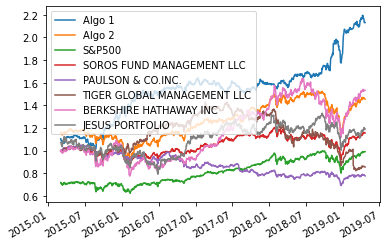

In [146]:
# Plotting cumulative returns
columns = ['Algo 1', 'Algo 2', 'S&P500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC',
          'BERKSHIRE HATHAWAY INC', 'JESUS PORTFOLIO']
cumulative_returns.columns = columns
cumulative_returns.plot()

print('''We can observe how the returns differ between funds. 
Algo 1 shows the highest levels of returns when compared to the others.
PAULSON & CO shows the lowest levels of return, and Algo 2 is mostly in par with fund like BERKSHIRE HATHAWAY.''')

In [147]:
columns = ['Algo 1', 'Algo 2', 'S&P500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC',
          'BERKSHIRE HATHAWAY INC', 'JESUS PORTFOLIO']
cumulative_returns.columns = columns
cumulative_returns.head()

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,JESUS PORTFOLIO
2015-03-03,1.104979,1.156329,0.718476,0.998734,0.995019,0.999504,0.993431,1.073537
2015-03-04,1.095489,1.159122,0.715323,1.000962,0.998245,0.996972,0.997617,1.072363
2015-03-05,1.094442,1.164134,0.716179,1.004981,1.002314,0.999319,1.004327,1.068345
2015-03-06,1.089018,1.150792,0.706028,0.997037,0.998731,0.990844,0.991172,1.051312
2015-03-09,1.083086,1.152292,0.708813,0.997617,1.002951,0.996633,0.989534,1.055188


The algorithm strategy Algo 1 outperformed both the market and funds.


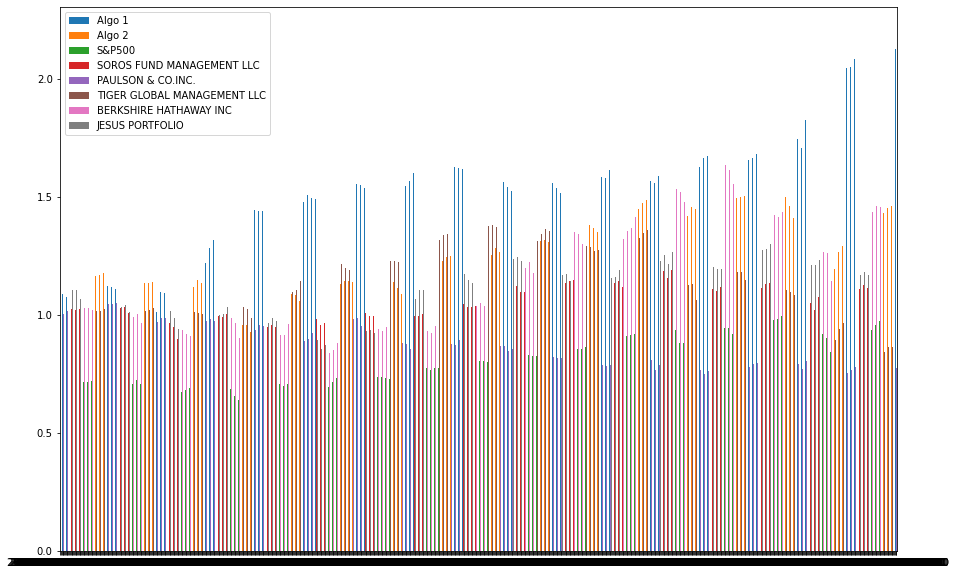

In [148]:
# Annualized Sharpe Ratios
def sharpe(y):
    return np.sqrt(252) * (y.mean() / y.std())

sharpe(cumulative_returns)

# Visualize the sharpe ratios as a bar plot
cumulative_returns.plot.bar(rot=0, figsize=(15,10))

print('The algorithm strategy Algo 1 outperformed both the market and funds.')

<AxesSubplot:>

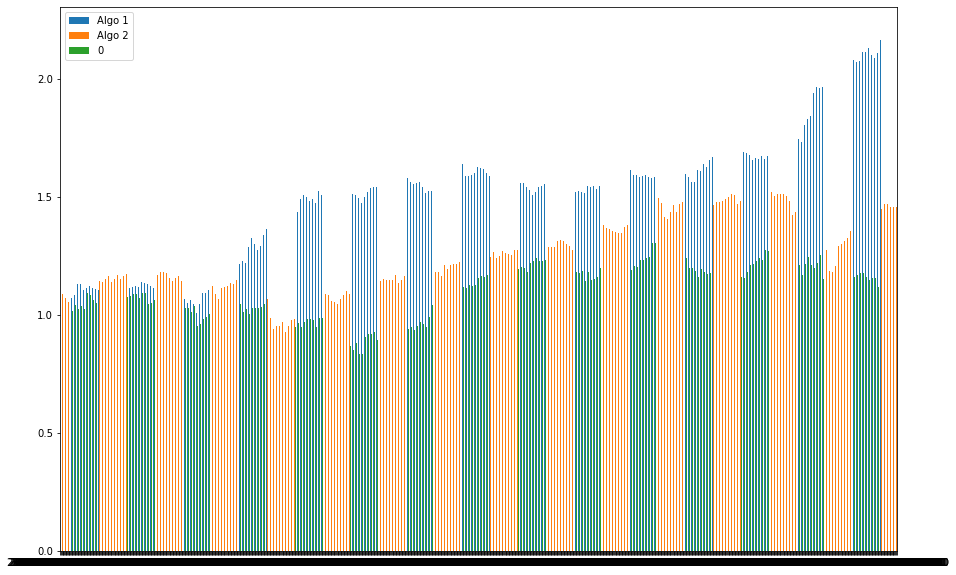

In [149]:
algo_vs_jesus_returns = pd.concat([cumulative_returns_algo, cumulative_returns_jesus], axis='columns', join='inner')

def sharpe(y):
    return np.sqrt(252) * (y.mean() / y.std())

sharpe(algo_vs_jesus_returns)

# Visualize the sharpe ratios as a bar plot
algo_vs_jesus_returns.plot.bar(rot=0, figsize=(15,10))

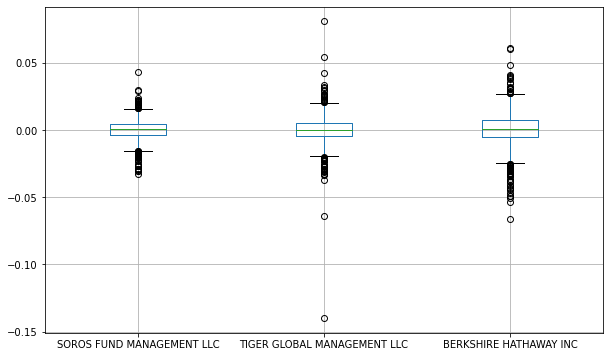

In [150]:
# Boxplot of each portfolio
boxplot_whales = whales.boxplot(column=['SOROS FUND MANAGEMENT LLC',
                                'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'], 
                                return_type='axes', figsize=(10,6))

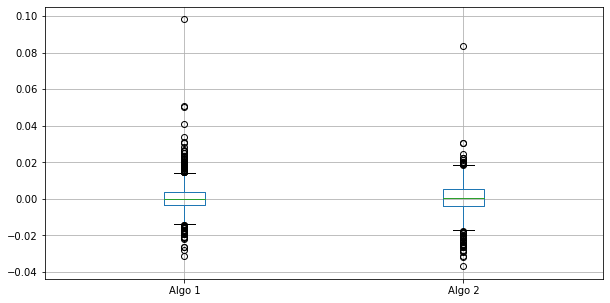

In [151]:
boxplot_algo = algo_returns.boxplot(column=['Algo 1','Algo 2'], 
                                    return_type='axes', figsize=(10,5))

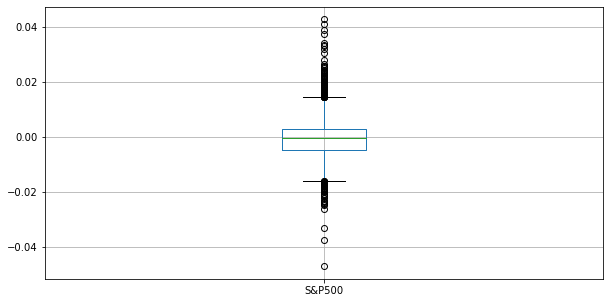

In [152]:
boxplot_sp500 = sp500_returns.boxplot(['S&P500'], return_type='axes',
                                     figsize=(10,5))

In [154]:
# Whales standard deviation
whales_std = whales.std()
# Algorithm portfolio standard deviation
algo_std = algo_returns.std()
#sp500 standar deviation
sp500_std = sp500_returns.std()
# Annual standard deviation for whales
whales_annual_std = annual_whales_std = whales.std()* np.sqrt(252)
# Annual standard deviation for algorithm
algo_annual_std = annual_algo_std = algo_returns.std()* np.sqrt(252)
# Annual standard deviation for sp500
annual_sp500_std = sp500_returns.std()* np.sqrt(252)

print(f'''Below are the results of riskiness from each portfolio. 
Based on our data we can conclude that the riskiest portfolio is 
BERKSHIRE HATHAWAY, and the least risky portfolio is TIGER GLOBAL 
when comparing them to the S&P500.
{whales_std}, {algo_std}, {sp500_std}.''')

Below are the results of riskiness from each portfolio. 
Based on our data we can conclude that the riskiest portfolio is 
BERKSHIRE HATHAWAY, and the least risky portfolio is TIGER GLOBAL 
when comparing them to the S&P500.
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64, Algo 1    0.007988
Algo 2    0.008466
dtype: float64, S&P500    0.008135
dtype: float64.


In [155]:
# Beta for Whales
covar_soros = cumulative_returns['SOROS FUND MANAGEMENT LLC'].cov(cumulative_returns['S&P500'])
var_soros = cumulative_returns['SOROS FUND MANAGEMENT LLC'].var()

covar_tiger = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(cumulative_returns['S&P500'])
var_tiger = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].var()

covar_berkshire = cumulative_returns['BERKSHIRE HATHAWAY INC'].cov(cumulative_returns['S&P500'])
var_berkshire = cumulative_returns['BERKSHIRE HATHAWAY INC'].var()

# Beta for algorithms
covar_algo1 = cumulative_returns['Algo 1'].cov(cumulative_returns['S&P500'])
var_algo1 = cumulative_returns['Algo 1'].var()

covar_algo2 = cumulative_returns['Algo 2'].cov(cumulative_returns['S&P500'])
var_algo2 = cumulative_returns['Algo 2'].var()

# Beta values
beta_soros = covar_soros / var_soros
beta_tiger = covar_tiger / var_tiger
beta_berkshire = covar_berkshire / var_berkshire
beta_algo1 = covar_algo1 / var_algo1
beta_algo2 = covar_algo2 / var_algo2

print(f'''The volatility of SOROS FUND MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC, AND 
BERKSHIRE HATHAWAY are:
{beta_soros}, {beta_tiger}, and {beta_berkshire} respectively.

We compare the volatilities with those of Harold's algorithm to find that Algo 1 has a volatility of {beta_algo1}, and Algo 2 has a volatility of {beta_algo2}.

In conclusion, and based on our findings we can determine that TIGER GLOBAL has
the smallest volatility and the SOROS FUND has the highest volatility score. 
This data tells usthat Harold has an algorithm that sits well in the middle as having lower volatilitythan most.''')


The volatility of SOROS FUND MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC, AND 
BERKSHIRE HATHAWAY are:
1.2453536622234804, 0.09420950476410678, and 0.4048524828152776 respectively.

We compare the volatilities with those of Harold's algorithm to find that Algo 1 has a volatility of 0.300021617151486, and Algo 2 has a volatility of 0.6601723955652479.

In conclusion, and based on our findings we can determine that TIGER GLOBAL has
the smallest volatility and the SOROS FUND has the highest volatility score. 
This data tells usthat Harold has an algorithm that sits well in the middle as having lower volatilitythan most.


<AxesSubplot:xlabel='Date'>

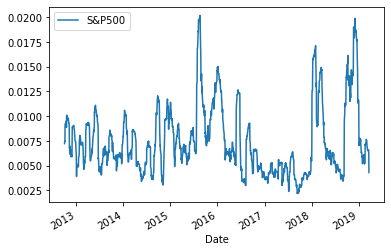

In [156]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

sp500_returns.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

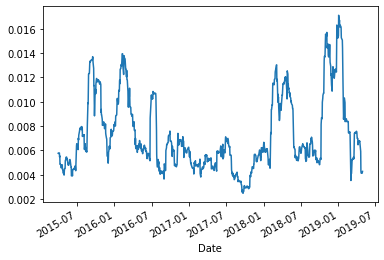

In [157]:
whales['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

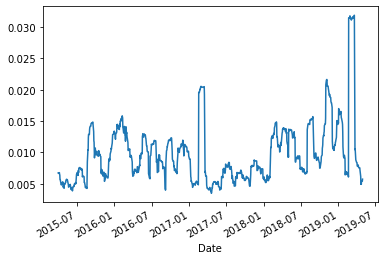

In [158]:
whales['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

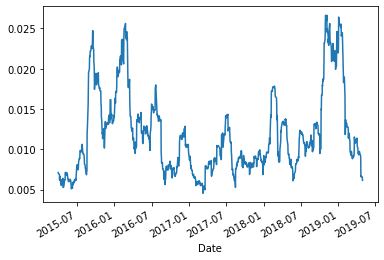

In [159]:
whales['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

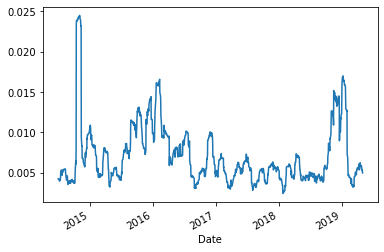

In [160]:
algo['Algo 1'].rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

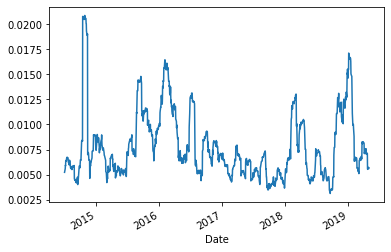

In [161]:
algo['Algo 2'].rolling(window=21).std().plot()

<AxesSubplot:>

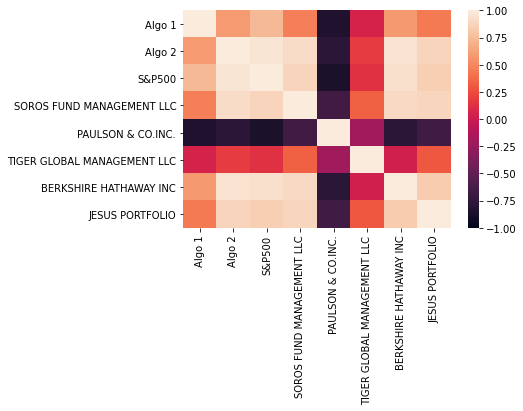

In [162]:
import seaborn as sns

# Calculate the correlation
portfolio_correlation = cumulative_returns.corr()

# Display de correlation matrix
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1)